In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("spotify.csv")

In [3]:
data.head(2)

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0


In [4]:
#Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
#the needful
data.isnull().sum()



,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [5]:
data.duplicated().sum()

27

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.duplicated().sum()

0

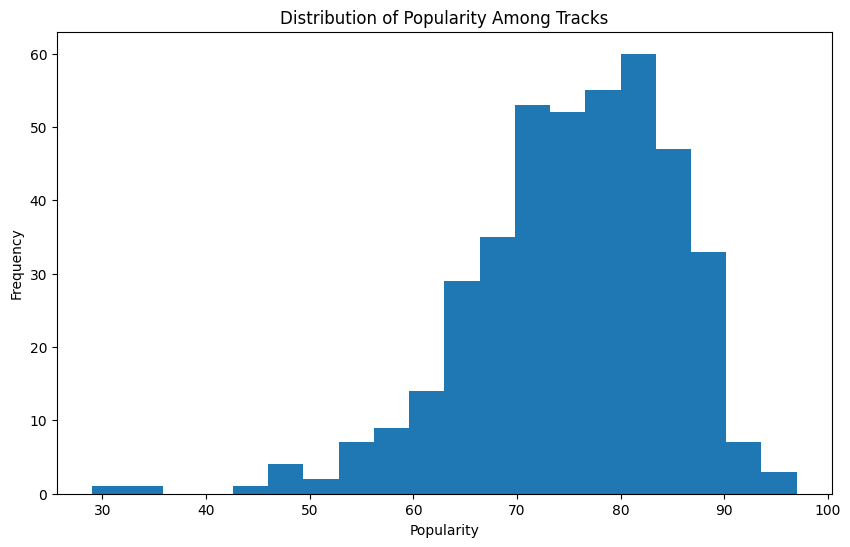

In [9]:
#What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Popularity'], bins=20)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity Among Tracks')
plt.show()

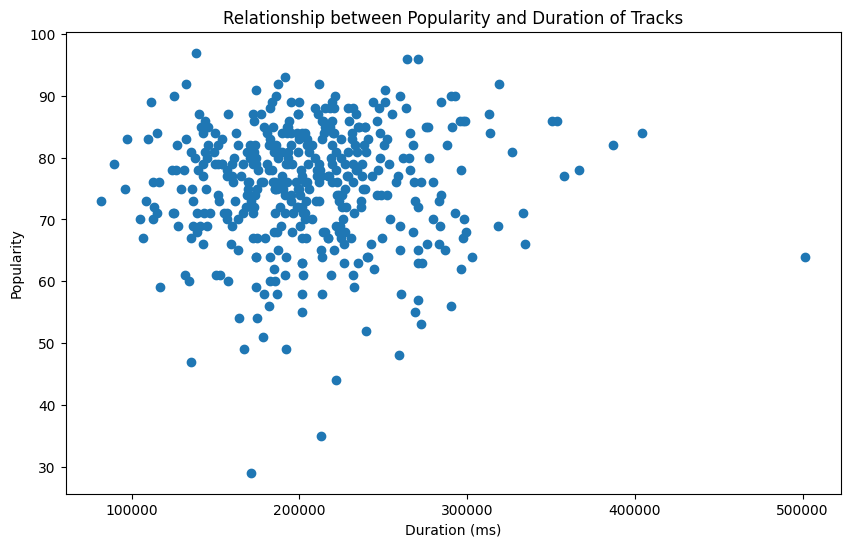

In [10]:
#Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

plt.figure(figsize=(10, 6))
plt.scatter(data['Duration (ms)'], data['Popularity'])
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('Relationship between Popularity and Duration of Tracks')
plt.show()

In [11]:
data.head(5)

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [14]:
#Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
#a countplot

artist_counts = data['Artist'].value_counts().reset_index()
artist_counts.columns = ['Artist', 'Track Count']

top_artist = artist_counts.loc[artist_counts['Track Count'].idxmax(), 'Artist']


In [15]:
top_artist

'Drake'

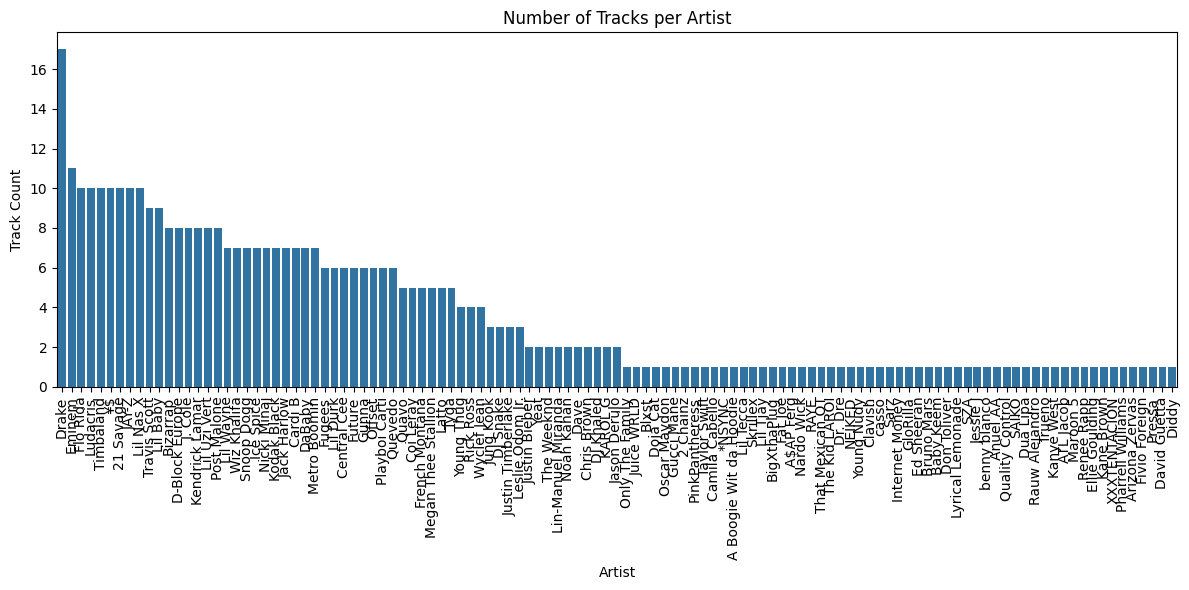

The artist with the highest number of tracks is: Drake


In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Artist', data=data, order=data['Artist'].value_counts().index)
plt.xlabel('Artist')
plt.ylabel('Track Count')
plt.title('Number of Tracks per Artist')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
print(f"The artist with the highest number of tracks is: {top_artist}")

In [18]:
data

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
433,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz
434,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS


In [21]:
#What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
least_popular_tracks = data.sort_values(by=['Popularity']).head(5)
for index, row in least_popular_tracks.iterrows():
    print(f"Artist: {row['Artist']}, Track: {row['Track Name']}, Popularity: {row['Popularity']}")

Artist: Pressa, Track: Attachments (feat. Coi Leray), Popularity: 29
Artist: Justin Bieber, Track: Intentions, Popularity: 35
Artist: French Montana, Track: Splash Brothers, Popularity: 44
Artist: Lil Baby, Track: On Me - Remix, Popularity: 47
Artist: Wyclef Jean, Track: 911 (feat. Mary J. Blige), Popularity: 48


In [23]:
#Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
#display the average popularity for each artist
top_5_artists = data['Artist'].value_counts().head(5).index
average_popularity_by_artist = data[data['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean()
highest_avg_popularity_artist = average_popularity_by_artist.idxmax()
highest_avg_popularity_artist

'Eminem'

In [25]:
# For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
for artist in top_5_artists:
    artist_data = data[data['Artist'] == artist].sort_values(by=['Popularity'], ascending=False)


In [26]:
most_popular_track = artist_data.iloc[0]['Track Name']
print(f"Artist: {artist}, Most Popular Track: {most_popular_track}")



Artist: Timbaland, Most Popular Track: The Way I Are


In [27]:
#Visualize relationships between multiple numerical variables simultaneously using a pair plot
numerical_vars = ['Popularity', 'Duration (ms)']

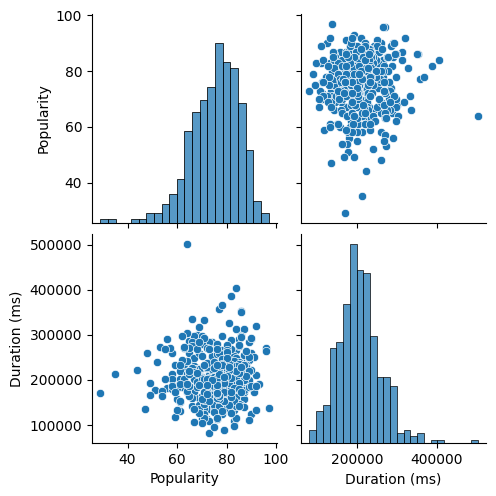

In [28]:
sns.pairplot(data[numerical_vars])
plt.show()

In [29]:
data.head(1)

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6


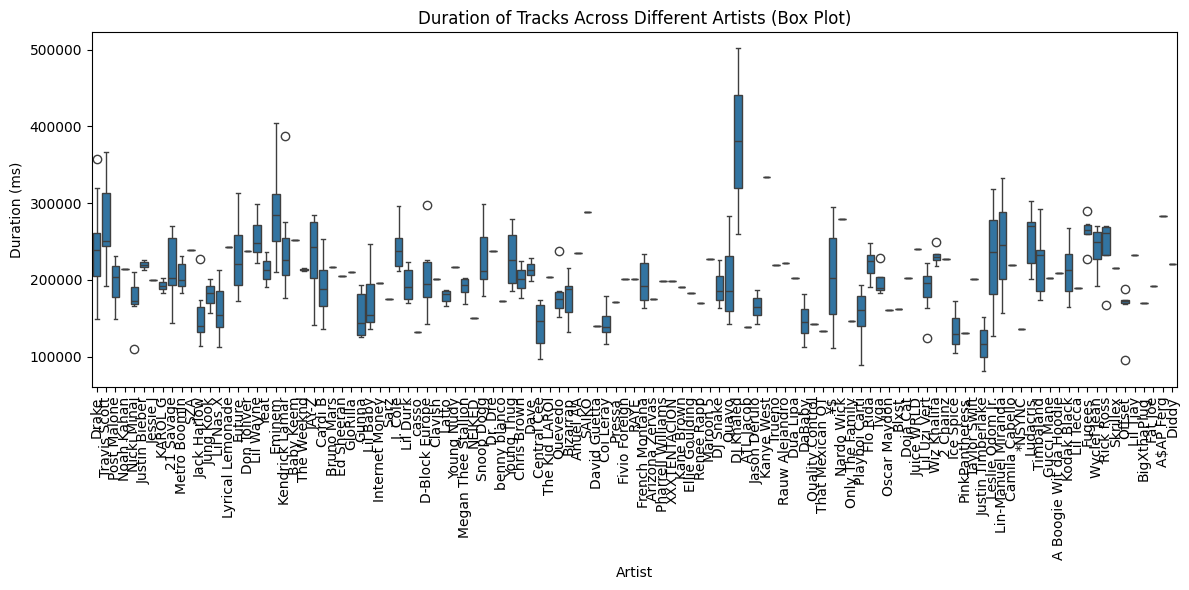

In [32]:
#Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
#violin plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=data)
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Duration of Tracks Across Different Artists (Box Plot)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

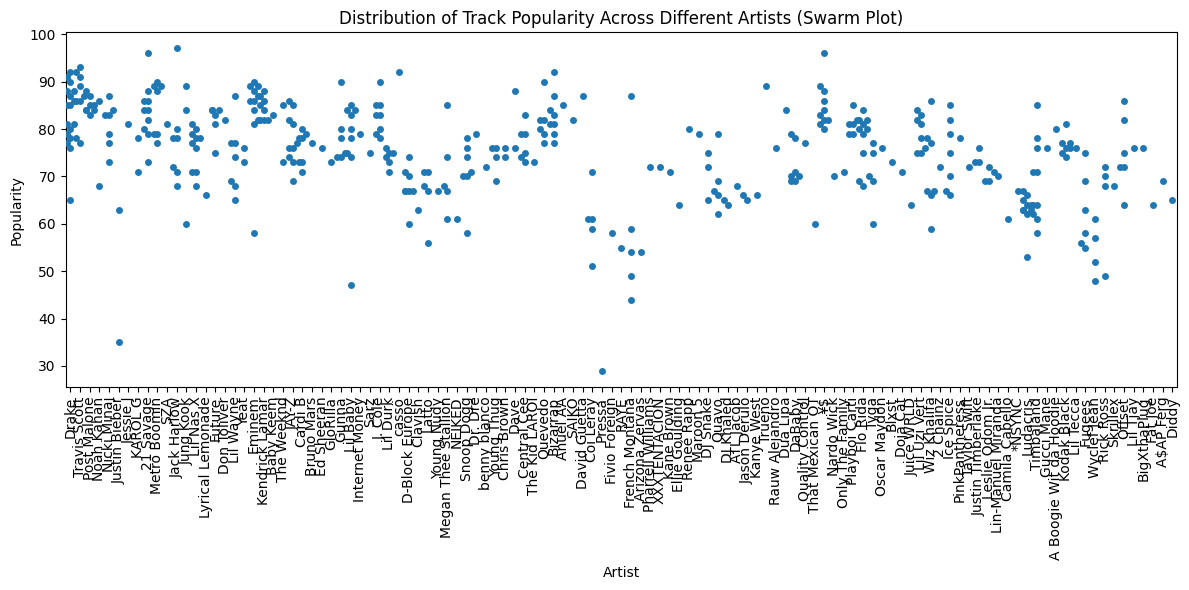

In [34]:
#How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
#violin plot.
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Artist', y='Popularity', data=data)
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Distribution of Track Popularity Across Different Artists (Swarm Plot)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()